In [29]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


In [30]:
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import math 
import random
import pandas as pd
import numpy as np
import os
import cv2
%matplotlib inline

#Loading train data

In [31]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

training_data=[]

def create_training_data():
    for category in classes:
        path=os.path.join('/content/CIFAR-10-images/train',category)
        class_num=classes.index(category) 

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))

                training_data.append([img_array,class_num]) 
            except Exception as e:  
                pass
        
create_training_data()
print(len(training_data))

100%|██████████| 5000/5000 [00:00<00:00, 14515.66it/s]

50000


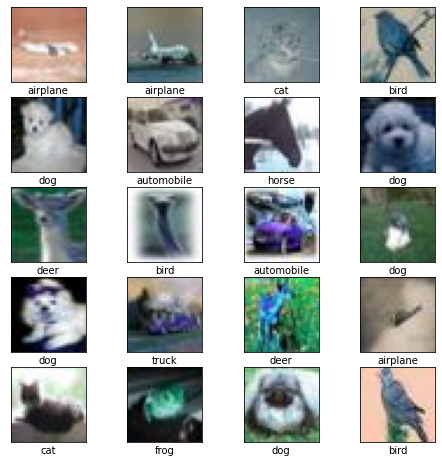

In [32]:
random.shuffle(training_data)

plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_data[i][0])
    plt.xlabel(classes[training_data[i][1]])
plt.show()

#Loading test data

In [33]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

def create_testing_data():
    for category in classes:
        path=os.path.join('/content/CIFAR-10-images/test',category)
        class_num=classes.index(category) 

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))

                test_data.append([img_array,class_num]) 
            except Exception as e:  
                pass
        
create_testing_data()
print(len(test_data))

100%|██████████| 1000/1000 [00:00<00:00, 15093.78it/s]

10000


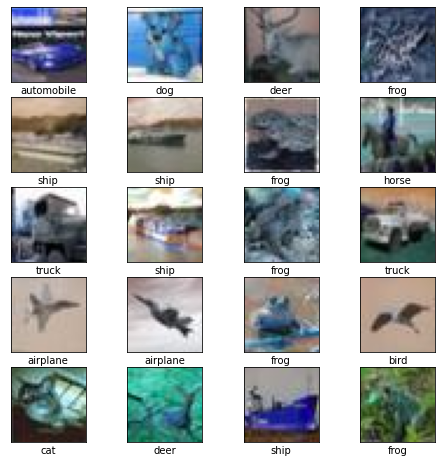

In [34]:
random.shuffle(test_data)

plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(classes[test_data[i][1]])
plt.show()

In [35]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(training_data)):
        x.append(np.sum(abs(np.subtract(training_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(training_data))):
            if np.sum(abs(np.subtract(training_data[i][0].flatten(),test.flatten())))==x[j]:
                prediction_array.append(training_data[i][1])
                break

    
    check = []
    for i in range(0, len(classes)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(classes)):
        if check[final_prediction] == max(check):
            return final_prediction

# Single prediction

In [36]:
Single_Prediction = l1_distance_accuracy(test_data[5555][0],10)    
print('Predicted result : ' + classes[Single_Prediction])
print('Correct result :' + classes[test_data[5555][1]])

Predicted result : ship
Correct result :ship


Text(0.5, 0, 'ship')

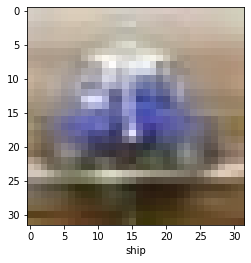

In [37]:
plt.imshow(test_data[5555][0],cmap=plt.cm.gray)
plt.xlabel(classes[test_data[5555][1]])

In [38]:
x_train = []
y_train = []
x_test = []
y_test = []
IMG_SIZE = 32

In [39]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
    
x_train= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    
x_test= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [40]:
import pickle

pickle_out = open("x_train,pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train,pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test,pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test,pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [41]:
pickle_in = open("x_train,pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train,pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("x_test,pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test,pickle","rb")
y_test = pickle.load(pickle_in)

In [42]:
accuracy = []

for k in range(1, 21):
    print("k: ", k)
    acc = []
    for f in range(5):
        validation_X, validation_Y = x_train[f*10000:(f+1)*10000], y_train[f*10000:(f+1)*10000]
        train_X = np.concatenate((x_train[:f*10000], x_train[(f+1)*10000:]), axis = 0)
        train_Y = np.concatenate((y_train[:f*10000], y_train[(f+1)*10000:]), axis = 0)
        cm = ce = 0         

        for i in range(len(validation_X)):
            L1_distance = []
            L2_distance = []

            for j in range(len(train_X)):
                # calculating distance between two images
                l1 = np.sum(np.absolute(np.subtract(validation_X[i], train_X[j])))

                # calculation distance between two images
                l2 = np.sqrt(np.sum((validation_X[i] - train_X[j])**2))
               # print(train_Y[j],[0])
                L1_distance.append([l1, train_Y[j],[0]])
                L2_distance.append([l2, train_Y[j],[0]])
        
                if j == 300:
                    break
            np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
            L1_distance = np.array(L1_distance)
            L1_distance = L1_distance[L1_distance[:, 0].argsort()]
            L2_distance = np.array(L2_distance)
            L2_distance = L2_distance[L2_distance[:, 0].argsort()]
      
            # for manhattan distance
            values = L1_distance[:k, 1]

            # print(values)
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

            #print(most_frequent_value)
            if most_frequent_value == validation_Y[i]:
                cm += 1
        
            # for euclidean distance
            values = L2_distance[:k, 1]
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
            if most_frequent_value == validation_Y[i]:
                ce += 1

            if i == 120:
                break

        acc.append([cm/100, ce/100])
    accuracy.append([acc, k])

print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.12, 0.13], [0.08, 0.14], [0.09, 0.19], [0.04, 0.13], [0.13, 0.18]], 1], [[[0.18, 0.11], [0.12, 0.12], [0.11, 0.12], [0.09, 0.12], [0.09, 0.17]], 2], [[[0.15, 0.17], [0.08, 0.1], [0.13, 0.16], [0.09, 0.11], [0.09, 0.15]], 3], [[[0.13, 0.19], [0.12, 0.1], [0.15, 0.17], [0.07, 0.11], [0.11, 0.15]], 4], [[[0.14, 0.16], [0.13, 0.1], [0.14, 0.16], [0.09, 0.11], [0.1, 0.14]], 5], [[[0.11, 0.13], [0.1, 0.08], [0.16, 0.15], [0.12, 0.12], [0.08, 0.12]], 6], [[[0.14, 0.14], [0.1, 0.07], [0.13, 0.17], [0.08, 0.12], [0.1, 0.11]], 7], [[[0.12, 0.1], [0.09, 0.11], [0.13, 0.18], [0.05, 0.13], [0.09, 0.13]], 8], [[[0.16, 0.09], [0.08, 0.08], [0.1, 0.19], [0.06, 0.12], [0.09, 0.15]], 9], [[[0.15, 0.09], [0.08, 0.09], [0.11, 0.17], [0.07, 0.11], [0.07, 0.14]], 10], [[[0.14, 0.13], [0.08, 0.09], [0.15, 0.21], [0.09, 0.13], [0.09, 0.15]], 11], [[[0.17, 0.16], [0.07, 0.08]

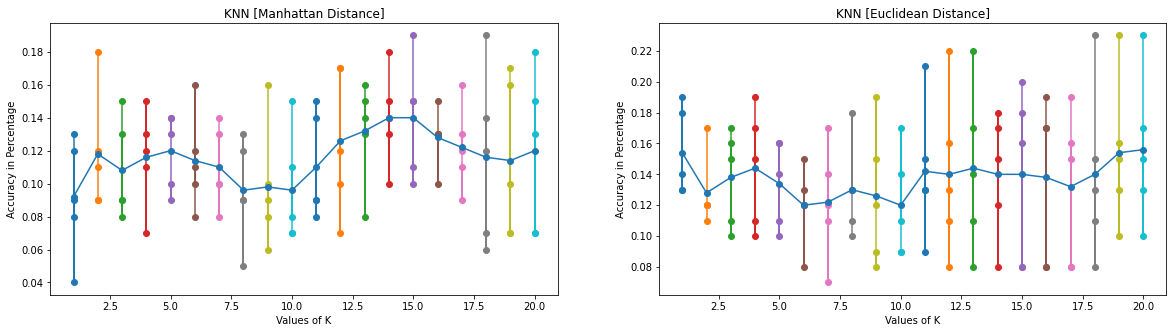

In [43]:
avg1 = []
avg2 = []
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('KNN [Manhattan Distance]')

for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l1 = np.array(accuracy[i][0])[:,0]
    avg1.append(np.average(l1))
    plt.plot(a, l1, 'o-')

plt.plot(k, avg1, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Accuracy in Percentage')
plt.subplot(1,2,2)
plt.title('KNN [Euclidean Distance]')


for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l2 = np.array(accuracy[i][0])[:,1]
    avg2.append(np.average(l2))
    plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Accuracy in Percentage')
  
plt.show()